[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


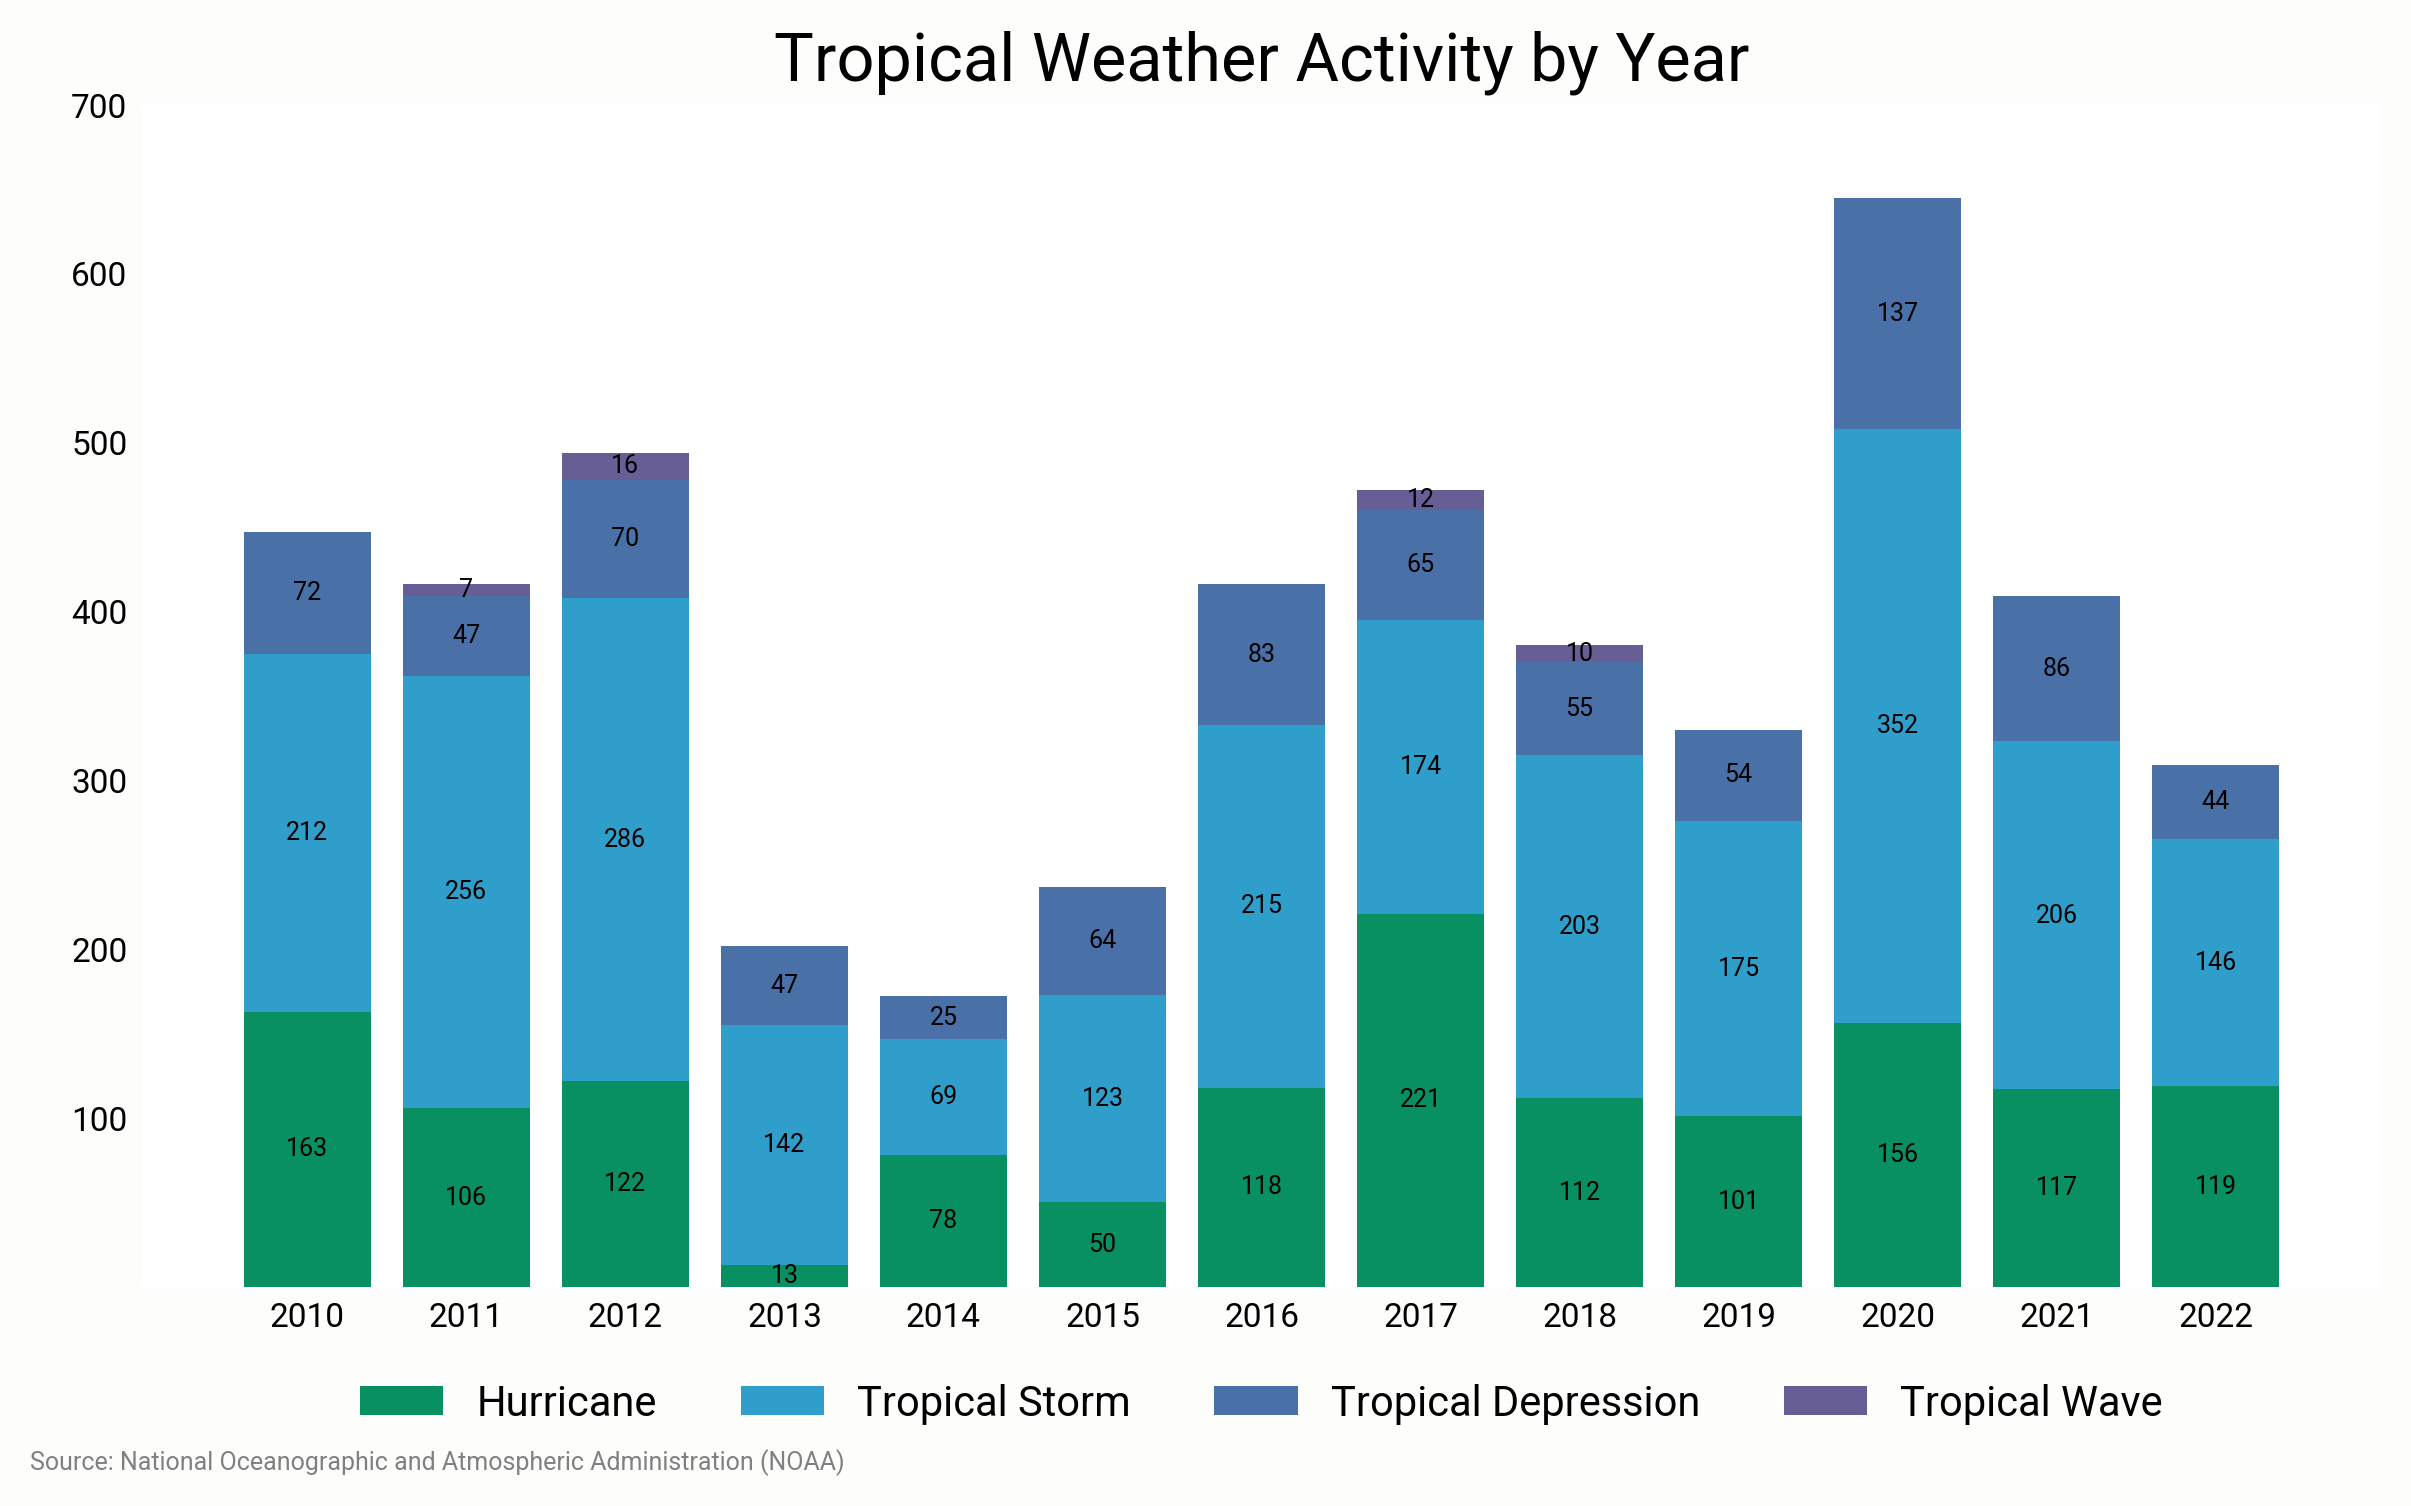

In [1]:
import pydytuesday
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
from pyfonts import load_google_font

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/storms/storms.csv"


df_storms = pl.read_csv(url)
df_storms.sort(['year'])
df_storms_pivot = df_storms.pivot('status', index='year', aggregate_function='max')
 

df_storms_pivot = df_storms_pivot.to_pandas()
year_range = list(range(2010, 2023))
print(year_range)

#plt.style.use('stylesheets/stylesheet-01.mplstyle')
font = load_google_font("Roboto")

colors = [
    '#099062',    # Green
    '#2f9eca',    # light blue
    '#4970a7',    # dark blue
    '#685e96',    # light purple
    '#732f68',    # dark purple
    '#170c12'     # black
]

fig, ax = plt.subplots(figsize=(8,5), dpi=300)

status = ['hurricane', 'tropical storm', 'tropical depression', 'tropical wave']
bottom = np.zeros(df_storms_pivot['year'].count())




for i, s in enumerate(status):
       h = ax.bar(df_storms_pivot.year
              , df_storms_pivot.loc[:, s]
              , label=s.title()
              , color=colors[i]
              , bottom=bottom)
       labels = [str(int(v)) if v > 0 else '' for v in df_storms_pivot.loc[:, s]]
       ax.bar_label(h, labels=labels, label_type='center', size=6, weight='bold', color='black', font=font )
       bottom += df_storms_pivot[s]


ax.set_xticks(year_range)
ax.set_xticklabels(year_range, fontproperties=font, fontsize=8)
ax.tick_params(axis='both', length=0)

ax.set_yticks([100, 200, 300, 400, 500, 600, 700])
ax.set_yticklabels([100, 200, 300, 400, 500, 600, 700], fontproperties=font, fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend(loc='upper center', ncol=4, frameon=False, bbox_to_anchor=(0.5, -0.05), prop=font, fontsize=8)
ax.set_title('Tropical Weather Activity by Year', fontproperties=font, size=16)

# Add source text at bottom right
fig.text(-0.05, -0.16, 'Source: National Oceanographic and Atmospheric Administration (NOAA)', 
         fontproperties=font, fontsize=6, ha='left', va='bottom', color='gray', transform=ax.transAxes)


fig.tight_layout()
fig.set_facecolor("#fdfdfc")
#fig.savefig('plots/Tropical-Weather-01.png', bbox_inches='tight')

plt.show()




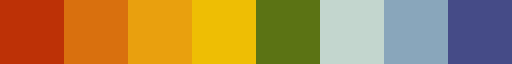

In [18]:
from pypalettes import load_cmap

cmap = load_cmap("VanGogh2")
cmap